# Simples Exemplos em Teste de Hipóteses 

### Referência:  [Dr. Tirthajyoti Sarkar](https://github.com/tirthajyoti), Fremont, 94536

Vamos lembrar que nosso objetivo é testar hipóteses científicas com uma formulação estatística, a fim de fazer alguma inferência sobre os parâmetros de algum modelo. 

Os testes que serão discutidos nesse notebook são: 

1. Proporção de uma população. 
2. Deferença entre proporção de populações
3. Média de uma população. 
4. Diferença enre médias de populações. 

In [5]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Proporção de uma População 

1. **Questão**: Em anos anteriores, 52% dos pais acreditavam que a falta de sono era causada por eletrônicos e as médias sociais em seus filhos e filhas adolescentes. E agora, como essa proporção se encontra? 

2. **População**: Pais com filhos e filhas adolescentes de 13 a 18 anos. 

3. **Parâmetro de interesse:** $p$

4. $H_0: p \le 0.52$ e $H_1: p > 0.52$. 

5. **Dados:** Pesquisa entre 1018 pessoas: 56% acreditam agora. 

### Teste Z para proporções 

Vamos usar um teste chamado teste Z, considerando que $X_1 , ..., X_n \sim Bernoulli(p)

$$
Z = \frac{\bar{X}_n - \pi_0}{\sqrt{(\pi_0(1 - \pi_0)/n)}}
$$

Onde $\pi_0$ é o valor limiar, no caso 0.52. 

Observe que quando $p = \pi_0$, a estatística $Z$ é aproximadamente normal padrão quando $n$ cresce. 

O que esse teste mensura? No denominador, temos o desvio padrão de quando $p = \pi_0$. Portanto, estamos medindo a distância entre a média amostral e o limiar em unidades de desvio padrão. Nosso procedimento de teste será, portanto, se $Z \ge c$, rejeitamos $H_0$, mas com nível de significância $\alpha_0$, isto é: 

$$
P(Z \ge c|p \le \pi_0) \le \alpha_0
$$

Podemos conferir que 

$$
\begin{split}
P(Z \ge c) &= P\left(\frac{\bar{X}_n - \pi_0}{\sqrt{(\pi_0(1 - \pi_0)/n)}} \ge c\right) \\
&= P\left(\frac{\bar{X}_n - p}{\sqrt{(p(1 - p)/n)}}\frac{\sqrt{(p(1 - p)/n)}}{\sqrt{(\pi_0(1 - \pi_0)/n)}} + \frac{p - \pi_0}{\sqrt{(\pi_0(1 - \pi_0)/n)}} \ge c\right) \\
&= P\left(\frac{\bar{X}_n - p}{\sqrt{(p(1 - p)/n)}} \ge c\frac{\sqrt{\pi_0(1 - \pi_0)}}{\sqrt{p(1 - p)}} - \frac{p - \pi_0}{\sqrt{(p(1 - p)/n)}}\right) \\
&\approx 1 - \Phi\left(c\frac{\sqrt{\pi_0(1 - \pi_0)}}{\sqrt{p(1 - p)}} - \frac{p - \pi_0}{\sqrt{(p(1 - p)/n)}}\right), \text{ pelo Teo. Central do Limite}
\end{split}
$$

Assim podemos encontrar $\alpha_0$ a partir do máximo que essa quantidade assume (Mas  com uma obseevação bem detalhada, quando $n$ é grande, $p = 0.52$ é o maximizador)

Mas como isso funciona na prática, propriamente dito.

Tenho que escolher um valor limiar para o p-valor, isto é, se p-valor for menor do que esse limiar, eu rejeito a hipótese. Vou ficar esse limiar em 0.05, mas isso é arbitrário, apesar da literatura costumar usá-lo. 

In [19]:
n = 1018
pnull = .52
phat = .56

In [18]:
ztest, pvalue = sm.stats.proportions_ztest(count = phat*n,   #número de sucessos
                                           nobs = n,          #número de observações
                                           value = pnull,    #pi_0
                                           alternative = 'larger') #hipótese alternativa 

print('O valor da estatística de teste foi {} e o p-valor {}'.format(ztest, pvalue))                        

O valor da estatística de teste foi 0.6392739759907055 e o p-valor 0.26132235751888716


### Conclusão do teste de hipóteses

Como o p-valor foi menor do que nosso limiar, nós temos evidência para rejeitar a hipótese nula que dizia que a prporção teria permanecido ou até diminuído. 

Isso não significa que aceitamos a hipótese alternativa, apenas que temos evidência para acreditar que a proporção seja maior do que 0.52. 

In [28]:
n = 1018
pnull = .52
phat = .53

In [29]:
ztest, pvalue = sm.stats.proportions_ztest(count = phat*n,   #número de sucessos
                                           nobs = n,          #número de observações
                                           value = pnull,    #pi_0
                                           alternative = 'larger') #hipótese alternativa 

print('O valor da estatística de teste foi {} e o p-valor {}'.format(ztest, pvalue))        

O valor da estatística de teste foi 0.6392739759907055 e o p-valor 0.26132235751888716


## Diferença entre propoções de duas populações 

1. **Questão**: Existe diferença significativa entre pais ingleses e pais alemães que reportaram que seus filhos e filhas tiveram aulas de natação? 

2. **População**: Pais com filhos e filhas ingleses e alemães. 

3. **Parâmetro de interesse:** $p_{ingleses} = p_i$ e $p_{alemaes} = p_a$.  

4. $H_0: p_i - p_a = 0$ e $H_1: p_i - p_a \neq 0$. 

5. **Dados:** 247 pais ingleses responderam e dentre eles 36.8% reportaram que sim. Pais alemães foram 308, 38.9% que disseram sim. 

### Teste T para proporções 

Na verdade, poderíamos usar o teste Z, com a mesma ideia, só que nesse caso, teríamos que tomar um pouco de cuidado com o denominador, dado que agora existem duas médias, então nosso estimador para o desvio padrão deve levar em conta esses dois fatores e $n$ deve ser suficientemente grande para que não tenhamos problema. 

Para evitar isso, vamos usar o T teste. A estatística de teste é a seguinte, tratando como $X$ e $Y$ as duas amostras consideradas. 

$$
t = \frac{\bar{X}_n - \bar{Y}_m}{SE}
$$

Nesse caso $SE$ é o erro entre a diferença entre a médias: isso tem um pequeno problema quando $m \neq n$. Então fazer as contas no papel não é trivial. 

Confira [aqui](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test) as definições de SE precisas. 

Como nossa intenção é apenas usar esse teste, vamos mostrar como isso pode ser prático. 


In [33]:
n = 247
pi = .368

m = 308
pa = .389

# Gerando as populações

england = np.random.binomial(n = 1, p = pi, size = n)
germany = np.random.binomial(n = 1, p = pa, size = m)

In [36]:
_, p_value, _ = sm.stats.ttest_ind(england, germany)

print('O p-valor foi {}'.format(p_value))

O p-valor foi 0.2615435082780627


### Conclusão sobre o teste de hipóteses

Dado que o p-valor é maior do que nosso limiar, não podemos rejeitar a hipótese nula. Nesse caso, a diferença das proporções nas popuçações não foi nada mais do que meramente uma aleatoriedade. 


### Mas o que acontece se essas proporções se mantiveram para mais pessoas? 

In [70]:
n = 5000
pi = .37

m = 5000
pa = .389

england = np.random.binomial(n = 1, p = pi, size = n)
germany = np.random.binomial(n = 1, p = pa, size = m)

In [71]:
_, p_value, _ = sm.stats.ttest_ind(england, germany)

print('O p-valor foi {}'.format(p_value))

O p-valor foi 0.027721099791980015


## Diferença entre médias de populações 

1. **Questão**: Considerando os adultos nos dados da [NHAMES](https://www.cdc.gov/nchs/nhanes/index.htm), homens tem maior média de [Índice de  Massa Corpórea](https://www.cdc.gov/healthyweight/assessing/bmi/index.html) do que mulheres? 

2. **População**: Adultos na base NHAMES. 

3. **Parâmetro de interesse:** $\mu_{homens} = \mu_h$ e $\mu_{mulheres} = \mu_m$.  

4. $H_0: \mu_1 = \mu_2$ e $H_1: \mu_1 \neq \mu_2$. 

5. **Dados:** 

2976 mulheres adultas

$\hat{\mu}_m = 29.94$  
$\hat{\sigma}_m = 7.75$  

2759 homens adultos

$\hat{\mu}_h = 28.78$  
$\hat{\sigma}_h = 6.25$  


In [72]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [73]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [74]:
n_m = len(females)
mu_m = females["BMXBMI"].mean()
sd_m = females["BMXBMI"].std()

(n_m, mu_m, sd_m)

(2976, 29.939945652173996, 7.75331880954568)

In [75]:
n_h = len(male)
mu_h = male["BMXBMI"].mean()
sd_h = male["BMXBMI"].std()

(n_h, mu_h, sd_h)

(2759, 28.778072111846985, 6.252567616801485)

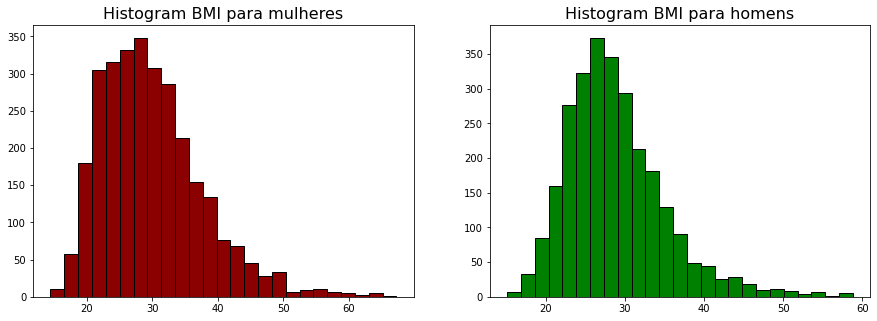

In [91]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_title("Histogram BMI para mulheres",fontsize=16)
ax[0].hist(females["BMXBMI"].dropna(), edgecolor='k', color='darkred',bins=25)
ax[1].set_title("Histogram BMI para homens", fontsize=16)
ax[1].hist(male["BMXBMI"].dropna(), edgecolor='k', color='green', bins=25)

plt.show()

### Vamos usar o t-test descrito em [Welch](https://en.wikipedia.org/wiki/Welch%27s_t-test). 

Temos que usá-lo porque não conhecemos a variância. Se conhecessemos, poderíamos usar o teste normal mesmo e se soubéssemos que são iguais, mas desconhecessemos, poderíamos usar o ttest ques estudamos no [capítulo 9.5](https://lucasmoschen.github.io/TA_sessions/infestatistica/TestingHypothesesII/TestingHypothesesII/#comparando-medias-de-duas-normais). 

In [81]:
sm.stats.ttest_ind(x1 = females["BMXBMI"].dropna(), 
                   x2 = male["BMXBMI"].dropna(),
                   alternative='two-sided', 
                   value = 0)  # diferença na hipótese nula

(6.175593353138302, 7.050275578095374e-10, 5660.0)

### Conclusão no teste de hipóteses

Como o p-valor é bem pequeno, nós podemos rejeitar a hipótese nula, o que significa que existe diferença estatística entre as médias. Isso não responde se a o índice é mais alto para homens, mas podemos fazer o teste unilateral e perceber que de fato isso de fato acontece segundo os dados.

In [82]:
sm.stats.ttest_ind(x1 = females["BMXBMI"].dropna(), 
                   x2 = male["BMXBMI"].dropna(),
                   alternative='larger', 
                   value = 0)  # diferença na hipótese nula

(6.175593353138302, 3.525137789047687e-10, 5660.0)